# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd

chip = pd.read_csv("chip_dataset.csv")
chip.head()

Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2     28.0              NaN                    NaN      2600.0    Intel   
3     80.0            160.0                 1400.0      1800.0    Intel   
4    125.0            258.0                  758.0      3700.0  Unknown   

  Vendor  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0    AMD          NaN          NaN          NaN  
1    AMD          NaN          NaN          NaN  
2  Intel          NaN          NaN          NaN  
3  Intel          NaN          NaN          NaN  
4    AMD          NaN          NaN          NaN

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
chip.isna().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [3]:
# as noted in EDA, the GFLOPS columns have a lot of null values, so i think even the info that is present won't be helpful for analysis
# the other 3 with notable nulls; TDP (thermal design power), die size, and transistors, are still useful info and the null is less than half of the values they represent

In [4]:
chip = chip.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'], axis=1)
chip.head()

Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry Vendor  
0     45.0             77.0                  122.0      2200.0  Unknown    AMD  
1     35.0            192.0                 4800.0      3200.0  Unknown    AMD  
2     28.0              NaN                    NaN      2600.0    Intel  Intel  
3     80.0            160.0                 1400.0      1800.0    Intel  Intel  
4    125.0            258.0                  758.0      3700.0  Unknown    AMD

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [5]:
chip.describe()

Unnamed: 0  Process Size (nm)      TDP (W)  Die Size (mm^2)  \
count  4854.000000        4845.000000  4228.000000      4139.000000   
mean   2426.500000          55.109598    81.359981       188.440445   
std    1401.373433          44.998676    76.807808       126.189383   
min       0.000000           0.000000     1.000000         1.000000   
25%    1213.250000          22.000000    33.000000       104.000000   
50%    2426.500000          40.000000    65.000000       148.000000   
75%    3639.750000          90.000000   100.000000       239.000000   
max    4853.000000         250.000000   900.000000       826.000000   

       Transistors (million)   Freq (MHz)  
count            4143.000000  4854.000000  
mean             1929.922279  1484.406057  
std              4044.891098  1066.701523  
min                 8.000000   100.000000  
25%               154.000000   590.000000  
50%               624.000000  1073.500000  
75%              1550.000000  2400.000000  
max             54200.000000  4700.000000

In [6]:
# going to take a look at distributions

<AxesSubplot:>

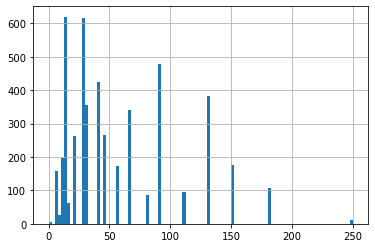

In [7]:
chip['Process Size (nm)'].hist(bins=100)

In [8]:
# at first glance this looks like an outlier, but could provide interesting information on rapid growth over time.
# this should be looked at more later

<AxesSubplot:>

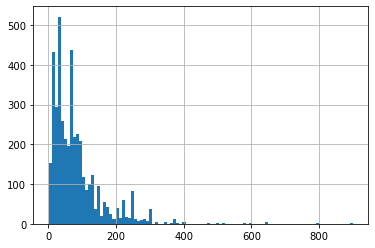

In [9]:
chip['TDP (W)'].hist(bins=100)

<AxesSubplot:>

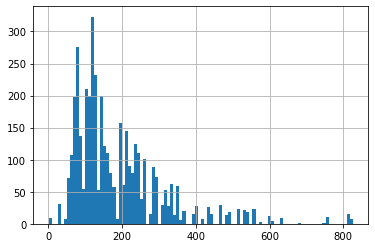

In [10]:
chip['Die Size (mm^2)'].hist(bins=100)

<AxesSubplot:>

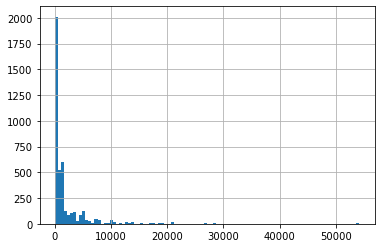

In [11]:
chip['Transistors (million)'].hist(bins=100)

In [12]:
# this one in particular looks bad. I will not remove Transistors but I will not use it analysis unless I have to.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [13]:
# unnecessary data was removed in the missing data stage
# the only other column that might be unecessary is the index called Unnamed:0 but I would like to leave it until there is a reason to remove it

In [14]:
chip.Foundry.value_counts()

TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: Foundry, dtype: int64

In [15]:
# i noticed there were a lot of 'unknowns' in the first 30 entries so wanted to check and see if this was potentially unecessary
# after seeing this breakdown, i think the amount of unknown is okay compared to the data that is there

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [16]:
chip.head(30)

Unnamed: 0                    Product Type Release Date  \
0            0        AMD Athlon 64 3500+  CPU   2007-02-20   
1            1           AMD Athlon 200GE  CPU   2018-09-06   
2            2       Intel Core i5-1145G7  CPU   2020-09-02   
3            3      Intel Xeon E5-2603 v2  CPU   2013-09-01   
4            4    AMD Phenom II X4 980 BE  CPU   2011-05-03   
5            5      Intel Xeon E5-2470 v2  CPU   2013-09-01   
6            6  AMD Phenom X4 9750 (125W)  CPU   2008-03-27   
7            7        Intel Pentium D 930  CPU   2006-01-16   
8            8       Intel Core i3-1125G4  CPU   2020-09-02   
9            9     AMD Athlon 64 X2 4200+  CPU   2006-05-23   
10          10          AMD Sempron 2800+  CPU   2004-08-01   
11          11       Intel Core i7-3632QM  CPU   2012-10-19   
12          12                   AMD C-70  CPU   2012-09-01   
13          13        Intel Core i5-8269U  CPU   2018-04-05   
14          14      AMD Phenom X4 9600 BE  CPU   2007-12-19   
15          15        Intel Pentium 3560Y  CPU   2013-09-01   
16          16  AMD Turion X2 Ultra ZM-84  CPU   2008-09-01   
17          17        Intel Pentium 4 506  CPU   2005-06-01   
18          18      Intel Xeon E5-2430 v2  CPU   2013-09-01   
19          19     AMD Athlon 64 X2 4800+  CPU   2006-05-23   
20          20        Intel Core i5-3427U  CPU   2012-06-01   
21          21         AMD Opteron 148 HE  CPU   2004-12-01   
22          22            AMD Athlon 1100  CPU   2000-08-14   
23          23          Intel Core i7-975  CPU   2009-06-02   
24          24        AMD Athlon 64 3500+  CPU   2001-01-01   
25          25     Intel Pentium 4 HT 672  CPU   2005-11-14   
26          26        Intel Pentium D 830  CPU   2005-05-26   
27          27              AMD EPYC 7371  CPU   2018-11-16   
28          28     Intel Pentium 4 HT 550  CPU   2004-06-21   
29          29    Intel Pentium III 1266S  CPU   2001-07-01   

    Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0                65.0     45.0             77.0                  122.0   
1                14.0     35.0            192.0                 4800.0   
2                10.0     28.0              NaN                    NaN   
3                22.0     80.0            160.0                 1400.0   
4                45.0    125.0            258.0                  758.0   
5                22.0     95.0            160.0                 1400.0   
6                65.0    125.0            285.0                  450.0   
7                65.0    130.0            140.0                  376.0   
8                10.0     28.0              NaN                    NaN   
9                90.0     89.0            156.0                  154.0   
10              130.0     62.0             80.0                   37.0   
11               22.0     35.0            160.0                 1480.0   
12               40.0      9.0             75.0                    NaN   
13               14.0     28.0            123.0                    NaN   
14               65.0     95.0            285.0                  450.0   
15               22.0     12.0            118.0                 1400.0   
16               65.0     35.0              NaN                    NaN   
17               90.0     84.0            109.0                  125.0   
18               22.0     80.0            160.0                 1400.0   
19               90.0    110.0            199.0                  233.0   
20               22.0     17.0            118.0                    NaN   
21               90.0     55.0              NaN                  106.0   
22              180.0     60.0            120.0                   37.0   
23               45.0    130.0            263.0                  731.0   
24               90.0     67.0            115.0                  105.0   
25               90.0     84.0            109.0                  169.0   
26               90.0    130.0            206.0     

In [17]:
# i wanted to look at the top 30 results to determine if there were inconsistencies
# i added code to the unecessary information based on these results
# everything else looks to be formatted correctly

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

1. I found it was worth checking all 4 types, even if I did not exactly find this type of data to clean.
2. This was very informative, especially concerning future visualizations.
3. I made notes as I cleaned the data. Overall I think there will be enough data here to create good visualizations. 

In [18]:
chip.to_csv("cleaned_chip.csv")

In [20]:
cleaned_chip = pd.read_csv("cleaned_chip.csv")

In [21]:
cleaned_chip.head()

Unnamed: 0.1  Unnamed: 0                  Product Type Release Date  \
0             0           0      AMD Athlon 64 3500+  CPU   2007-02-20   
1             1           1         AMD Athlon 200GE  CPU   2018-09-06   
2             2           2     Intel Core i5-1145G7  CPU   2020-09-02   
3             3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01   
4             4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03   

   Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0               65.0     45.0             77.0                  122.0   
1               14.0     35.0            192.0                 4800.0   
2               10.0     28.0              NaN                    NaN   
3               22.0     80.0            160.0                 1400.0   
4               45.0    125.0            258.0                  758.0   

   Freq (MHz)  Foundry Vendor  
0      2200.0  Unknown    AMD  
1      3200.0  Unknown    AMD  
2      2600.0    Intel  Intel  
3      1800.0    Intel  Intel  
4      3700.0  Unknown    AMD